In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
% matplotlib inline

In [4]:
data = pd.read_csv('nurve-master-0422.csv')
data['merge_key'] = data.index

In [18]:
roughness = data[['ID', 'GPS_DATETIMESTAMP', 'GPS_LAT', 'GPS_LON', 'RDQ_AcXMea', 'RDQ_AcYMea','RDQ_AcZMea', 'sensor', 'merge_key']]

In [19]:
roughness = roughness.convert_objects(convert_numeric=True)

/Users/maxfacts/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [20]:
roughness['X'] = roughness.RDQ_AcXMea ** 2
roughness['Y'] = roughness.RDQ_AcYMea ** 2
roughness['Z'] = roughness.RDQ_AcZMea ** 2
roughness['acel'] = np.sqrt(roughness.X + roughness.Y + roughness.Z)

In [21]:
high = np.mean(roughness.acel) + (2* np.nanstd(roughness.acel))
low = np.mean(roughness.acel) - (2* np.nanstd(roughness.acel))

In [22]:
start = len(roughness['acel'])
roughness = roughness[roughness.acel <= high]
roughness = roughness[roughness.acel >= low]
end = len(roughness['acel'])

print 'Dropped %s observations of the orignal %s (%s percent) as they were two Z scores from the mean' % (start - end, start, start/end)

Dropped 56249 observations of the orignal 557306 (1 percent) as they were two Z scores from the mean


In [23]:
clen = len(roughness.sensor.unique())

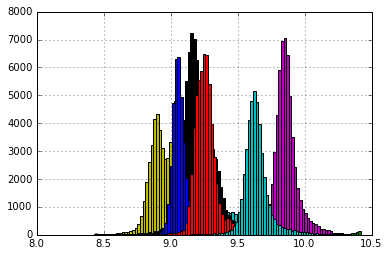

In [24]:
sensorthresholds = []
for i in range(clen):
    temp = roughness[roughness.sensor == i]
    temp.acel.hist(bins= 100)
    sensorthresholds.append((i, np.percentile(temp.acel, 90)))

In [25]:
sensorthresholds

[(0, 9.2049180477497003),
 (1, 9.2586045221678273),
 (2, 9.7566731671018054),
 (3, 9.4871585410281831),
 (4, 9.9682929150287567),
 (5, 9.2156360241696511),
 (6, 9.3706343397843845),
 (7, 9.2129926564513873),
 (8, 10.410658047760045),
 (9, 9.3568568086721733),
 (10, 9.7455062120956359)]

In [26]:
sensorthresholds = pd.DataFrame(sensorthresholds)
sensorthresholds.columns = ['sensor', 'threshold']
sensorthresholds.head(2)

,sensor,threshold
0,0,9.204918
1,1,9.258605


In [27]:
roughness = roughness.merge(sensorthresholds, on = 'sensor', how = 'left')

In [28]:
roughness['bumpflag'] = roughness.acel >= roughness.threshold

In [29]:
bumps = roughness[['ID', 'GPS_DATETIMESTAMP','GPS_LAT', 'GPS_LON', 'sensor', 'acel', 'bumpflag', 'merge_key']]

In [32]:
bumps.head(50)

,ID,GPS_DATETIMESTAMP,GPS_LAT,GPS_LON,sensor,acel,bumpflag,merge_key
0,29281,2015-10-26 0:0:15.0,42.338428,-71.084632,0,8.875540,False,0
1,29283,2015-10-26 0:0:15.0,42.338428,-71.084632,0,9.120457,False,1
2,29285,2015-10-26 0:0:15.0,42.338428,-71.084632,0,8.776096,False,2
3,29287,2015-10-26 0:0:15.0,42.338428,-71.084632,0,8.981436,False,3
4,29289,2015-10-26 0:0:15.0,42.338428,-71.084632,0,8.835420,False,4
5,29290,2015-10-26 0:0:22.0,42.337970,-71.085327,0,8.720062,False,5
6,29292,2015-10-26 0:0:22.0,42.337970,-71.085327,0,9.129841,False,6
7,29294,2015-10-26 0:0:22.0,42.337970,-71.085327,0,9.281124,True,7
8,29296,2015-10-26 0:0:22.0,42.337970,-71.085327,0,9.137831,False,8
9,29298,2015-10-26 0:0:22.0,42.337970,-71.085327,0,8.866341,False,9


In [30]:
bumps.to_pickle('bumps.pkl')